# Bar chart Racing for COVID19 deaths
from 2020-02-26  to 2020-04-22  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('data/covid19.csv', index_col='date', 
                  parse_dates=['date'])
df.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,2746.0,2.0,NaN,NaN,NaN,26.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,2790.0,2.0,NaN,NaN,NaN,34.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,2837.0,2.0,NaN,NaN,NaN,43.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-03-01,NaN,NaN,NaN,2872.0,2.0,NaN,NaN,NaN,54.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [3]:
s = df.loc['2020-03-29']
s

Belgium             431.0
Brazil              136.0
Canada               64.0
China              3304.0
France             2611.0
Germany             533.0
India                27.0
Indonesia           114.0
Iran               2640.0
Ireland              46.0
Italy             10779.0
Mexico               16.0
Netherlands         772.0
Portugal            119.0
Spain              6803.0
Sweden              110.0
Switzerland         300.0
Turkey              131.0
USA                2566.0
United Kingdom     1231.0
Name: 2020-03-29 00:00:00, dtype: float64

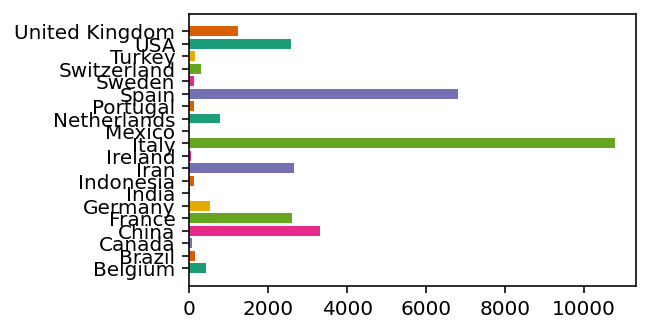

In [4]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)

colors = plt.cm.Dark2(range(6))

y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

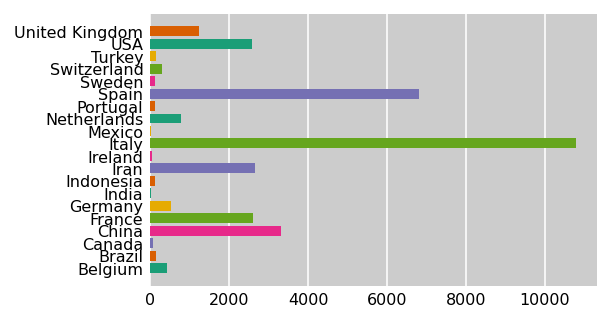

In [5]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

In [6]:
df.loc['2020-03-29'].rank(method='first')

Belgium           11.0
Brazil             9.0
Canada             4.0
China             18.0
France            16.0
Germany           12.0
India              2.0
Indonesia          6.0
Iran              17.0
Ireland            3.0
Italy             20.0
Mexico             1.0
Netherlands       13.0
Portugal           7.0
Spain             19.0
Sweden             5.0
Switzerland       10.0
Turkey             8.0
USA               15.0
United Kingdom    14.0
Name: 2020-03-29 00:00:00, dtype: float64

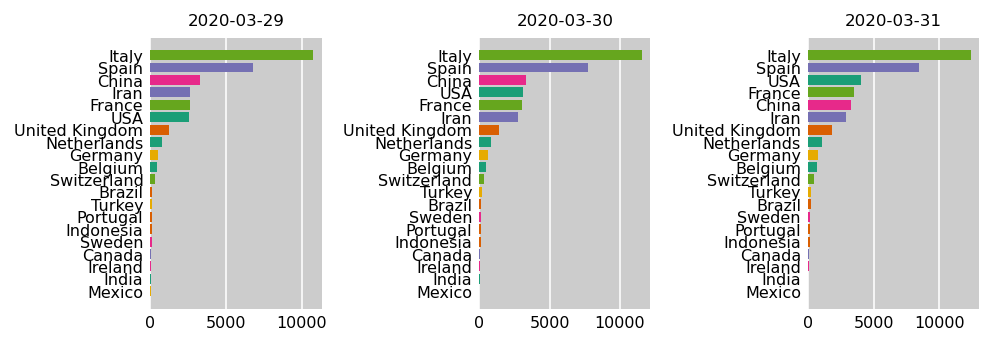

In [7]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)

dates = ['2020-03-29', '2020-03-30', '2020-03-31']

for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first').values
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [8]:
df2 = df.loc['2020-03-29':'2020-03-31']
df2 = df2.reset_index()
df2.index = df2.index * 5

last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))

df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('date')
df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Rank each row
df_rank_expanded = df_expanded.rank(axis=1, method='first')

# Linear interpolate missing values.
df_expanded = df_expanded.interpolate()

# We also need to interpolate the ranking.
df_rank_expanded = df_rank_expanded.interpolate()

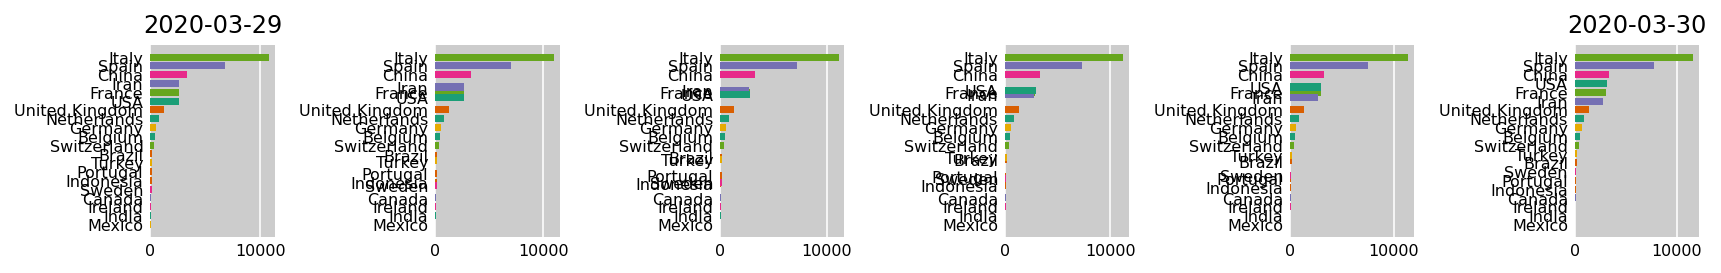

In [10]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-29')
ax_array[-1].set_title('2020-03-30');

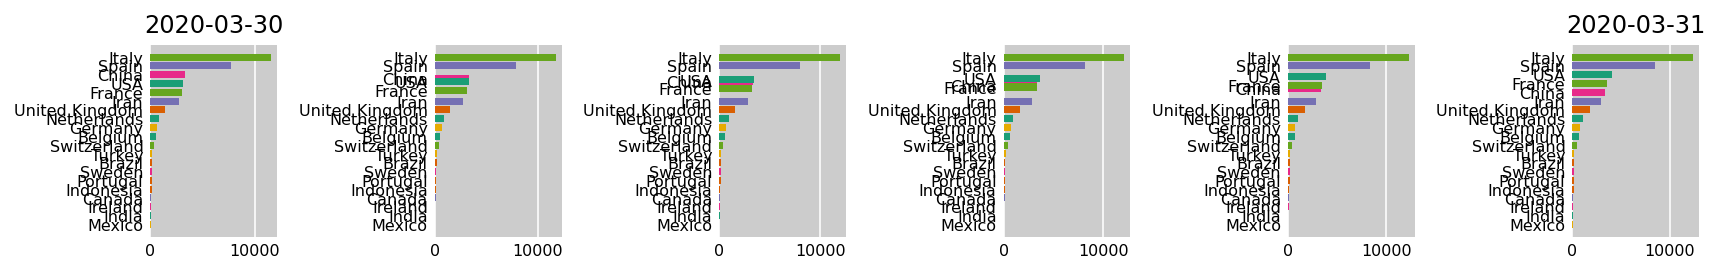

In [11]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-30')
ax_array[-1].set_title('2020-03-31');

In [12]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2722.8,2.0,NaN,NaN,NaN,20.4,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2728.6,2.0,NaN,NaN,NaN,21.8,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2734.4,2.0,NaN,NaN,NaN,23.2,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2740.2,2.0,NaN,NaN,NaN,24.6,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_rank_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime("%Y-%m-%d")
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [15]:
from IPython.display import HTML

html = anim.to_html5_video()
HTML(html)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos